[INFO] starting training...


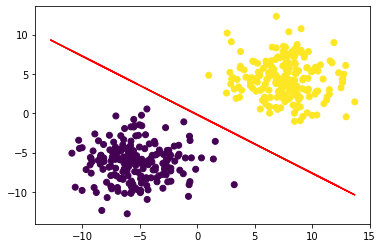

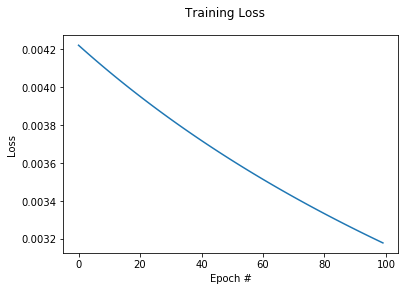

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import argparse
 
def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))
 
def next_batch(X, y, batchSize):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], y[i:i + batchSize])

(X, y) = make_blobs(n_samples=400, n_features=2, centers=2,
    cluster_std=2.5, random_state=95)

X = np.c_[np.ones((X.shape[0])), X]
 
print("[INFO] starting training...")
W = np.random.uniform(size=(X.shape[1],))

lossHistory = []
for epoch in np.arange(0, 100):
    epochLoss = []
 
    for (batchX, batchY) in next_batch(X, y, 32):
        preds = sigmoid_activation(batchX.dot(W))
 
        error = preds - batchY
 
        loss = np.sum(error ** 2)
        epochLoss.append(loss)
        gradient = batchX.T.dot(error) / batchX.shape[0]
        W += -0.01 * gradient
    lossHistory.append(np.average(epochLoss))
    
Y = (-W[0] - (W[1] * X)) / W[2]
 

plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")
 

fig = plt.figure()
plt.plot(np.arange(0, 100), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()